# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

d = datetime.datetime.today().strftime('%m/%d/%Y')

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval\n    -----------------------------")

# Initialize count and group
count = 0
group = 1

# Creating DataFrame and specify the column names
weather_df = pd.DataFrame(columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'])

# Run the loop for all the cities
for city in cities:
    try:
        count+=1
        #Declaring the API key
        api = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_keys.api_key}&q={city}"
        
        #Printing the results
        print(f"Processing Record {count} of Set {group} | {city}")
        print(api)
        
        #Once the count reach 50, set count to 0 and increment group 
        if count == 50:
            count = 0
            group+=1
        
        #Send get request and get the response in json.
        response = requests.get(api).json()
        
        #Parsing the below value fromt the json response.
        cloudiness = response["clouds"]["all"]
        country = response["sys"]["country"]
        date = response["dt"]
        humidity = response["main"]["humidity"]
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        wind_speed = response["wind"]["speed"]
        
        #Declare Dictionary with all the values
        weather = {"City":city,"Cloudiness":cloudiness,"Country":country,"Date":date,"Humidity":humidity,"Lat":lat,"Lng":lng,"Max Temp":max_temp,"Wind Speed":wind_speed}
        
        #Append the dictionary to the data frame.
        weather_df = weather_df.append(weather, ignore_index=True)
        
    except:
        #If city is not found, print as not found.
        print("City not found. Skipping...")
        
        
print("----------------------------- \nData Retrieval Complete      \n-----------------------------" )

    
    

Beginning Data Retrieval
    -----------------------------
Processing Record 1 of Set 1 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=geraldton
Processing Record 2 of Set 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=qaanaaq
Processing Record 3 of Set 1 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=vaini
Processing Record 4 of Set 1 | sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=sola
Processing Record 5 of Set 1 | andenes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=andenes
City not found. Skipping...
Processing Record 6 of Set 1 | sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=sao filipe
Processing Re

Processing Record 3 of Set 2 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=severo-kurilsk
Processing Record 4 of Set 2 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=esperance
Processing Record 5 of Set 2 | tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=tautira
Processing Record 6 of Set 2 | paita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=paita
Processing Record 7 of Set 2 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=barrow
Processing Record 8 of Set 2 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=castro
Processing Record 9 of Set 2 | kulhudhuffushi
http://api.openweathermap.org/data/2.5/weath

Processing Record 6 of Set 3 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=kavieng
Processing Record 7 of Set 3 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=cidreira
Processing Record 8 of Set 3 | vostochnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=vostochnyy
Processing Record 9 of Set 3 | vila do maio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=vila do maio
Processing Record 10 of Set 3 | mao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=mao
Processing Record 11 of Set 3 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=saleaula
City not found. Skipping...
Processing Record 12 of Set 3 | mitsamiouli
http://api.ope

Processing Record 9 of Set 4 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=umzimvubu
City not found. Skipping...
Processing Record 10 of Set 4 | jalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=jalu
Processing Record 11 of Set 4 | camana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=camana
City not found. Skipping...
Processing Record 12 of Set 4 | lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=lasa
Processing Record 13 of Set 4 | ilheus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=ilheus
Processing Record 14 of Set 4 | dwarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=dwarka
Processing Record 15 of Set 4 | bredasdorp
http://api

Processing Record 12 of Set 5 | punta de piedra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=punta de piedra
Processing Record 13 of Set 5 | coracora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=coracora
Processing Record 14 of Set 5 | nyuksenitsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=nyuksenitsa
Processing Record 15 of Set 5 | pacifica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=pacifica
Processing Record 16 of Set 5 | mayor pablo lagerenza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=mayor pablo lagerenza
Processing Record 17 of Set 5 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=fortuna
Processing Record 18 of Set 5 | chokur

Processing Record 15 of Set 6 | naranjal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=naranjal
Processing Record 16 of Set 6 | college
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=college
Processing Record 17 of Set 6 | pyu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=pyu
Processing Record 18 of Set 6 | sulphur springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=sulphur springs
Processing Record 19 of Set 6 | dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=dunedin
Processing Record 20 of Set 6 | eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=eureka
Processing Record 21 of Set 6 | uspantan
http://api.openweathermap.org/data/2.5/weathe

Processing Record 19 of Set 7 | talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=talnakh
Processing Record 20 of Set 7 | lima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=lima
Processing Record 21 of Set 7 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=khatanga
Processing Record 22 of Set 7 | madawaska
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=madawaska
Processing Record 23 of Set 7 | sumbawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=sumbawa
City not found. Skipping...
Processing Record 24 of Set 7 | hauknes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=hauknes
Processing Record 25 of Set 7 | grenville
http://api.openweatherma

Processing Record 22 of Set 8 | bargal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=bargal
City not found. Skipping...
Processing Record 23 of Set 8 | kisangani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=kisangani
Processing Record 24 of Set 8 | bilibino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=bilibino
Processing Record 25 of Set 8 | radcliff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=radcliff
Processing Record 26 of Set 8 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=lorengau
Processing Record 27 of Set 8 | racale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=racale
Processing Record 28 of Set 8 | klyuchevskiy
http://api.open

Processing Record 25 of Set 9 | koshurnikovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=koshurnikovo
Processing Record 26 of Set 9 | havoysund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=havoysund
Processing Record 27 of Set 9 | fort nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=fort nelson
Processing Record 28 of Set 9 | galveston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=galveston
Processing Record 29 of Set 9 | qasigiannguit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=qasigiannguit
Processing Record 30 of Set 9 | linxi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=linxi
Processing Record 31 of Set 9 | porto novo
http://api.openwe

City not found. Skipping...
Processing Record 27 of Set 10 | trairi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=trairi
Processing Record 28 of Set 10 | manacapuru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=manacapuru
Processing Record 29 of Set 10 | sayyan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=sayyan
Processing Record 30 of Set 10 | ypsonas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=ypsonas
Processing Record 31 of Set 10 | tucurui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=tucurui
Processing Record 32 of Set 10 | khandyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=khandyga
Processing Record 33 of Set 10 | cuiluan
http://api.open

Processing Record 30 of Set 11 | santa maria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=santa maria
Processing Record 31 of Set 11 | ngunguru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=ngunguru
Processing Record 32 of Set 11 | calabozo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=calabozo
Processing Record 33 of Set 11 | praia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=praia
Processing Record 34 of Set 11 | sorvag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=sorvag
City not found. Skipping...
Processing Record 35 of Set 11 | maghama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=maghama
City not found. Skipping...
Processing Record 36 of Se

Processing Record 33 of Set 12 | vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=vardo
Processing Record 34 of Set 12 | kalianget
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=kalianget
Processing Record 35 of Set 12 | morondava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=morondava
Processing Record 36 of Set 12 | marawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=marawi
Processing Record 37 of Set 12 | yashalta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=yashalta
Processing Record 38 of Set 12 | samana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64862cf92c4b348c66a9bd5cc77accf7&q=samana
Processing Record 39 of Set 12 | benguela
http://api.openweathermap.org/data/2.5/weath

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Display the count of entries in data frame
weather_df.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [16]:
#Save the Data frame and display the first 5 city details.
weather_df.to_csv(output_data_file)
weather_df.head()


'01/07/2019'

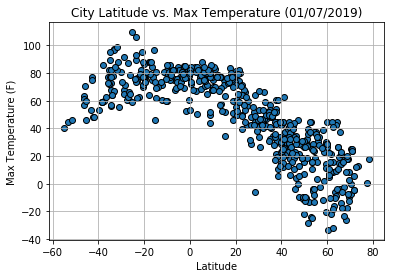

In [23]:
#Creating the plot by camparing Latitude and Max Temp"
plt.scatter(weather_df.Lat,weather_df["Max Temp"],edgecolors = 'black')
plt.title(f"City Latitude vs. Max Temperature ({d})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('output_data/Latitude_MaxTemp.png')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

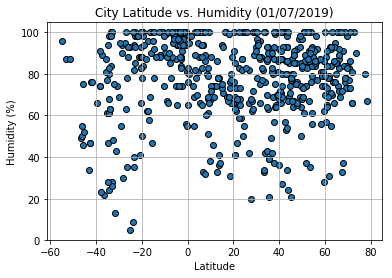

In [22]:
#Creating the plot by camparing Latitude and Humidity"
plt.scatter(weather_df.Lat,weather_df.Humidity,edgecolors = 'black')
plt.title(f"City Latitude vs. Humidity ({d})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('output_data/Latitude_Humidity.png')

#### Latitude vs. Humidity Plot

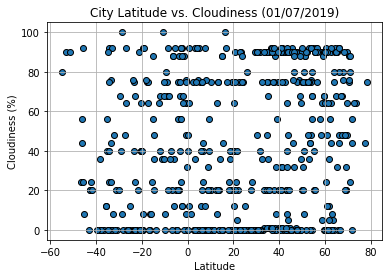

In [21]:
#Creating the plot by camparing Latitude and Cloudiness"
plt.scatter(weather_df.Lat,weather_df.Cloudiness,edgecolors = 'black')
plt.title(f"City Latitude vs. Cloudiness ({d})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('output_data/Latitude_Cloudiness.png')

#### Latitude vs. Cloudiness Plot

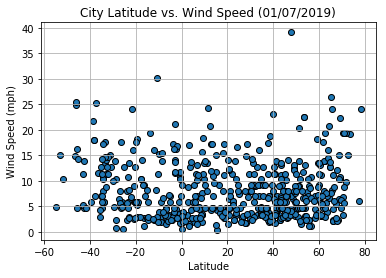

In [20]:
#Creating the plot by camparing Latitude and Wind Speed"
plt.scatter(weather_df.Lat,weather_df["Wind Speed"],edgecolors = 'black')
plt.title(f"City Latitude vs. Wind Speed ({d})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('output_data/Latitude_Wind_Speed.png')

#### Latitude vs. Wind Speed Plot